In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
# import talib as ta
from sklearn import neighbors
from sklearn import svm
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("WTI.csv")
df = df.drop(df.columns[[0]], axis=1)
df.head()

,Uopen,Ulow,Uhigh,Uclose
0,52.15,51.93,53.25,52.20
1,52.65,52.04,53.58,52.34
2,52.76,51.85,53.30,52.85
3,52.91,52.29,53.25,52.61
4,52.17,51.82,52.95,52.77


In [3]:
N = 2
w = 2*N + 1

for i in range(0,df.shape[0]-1):
    df.loc[df.index[i],'c'] = df['Uclose'][i] - df['Uclose'][i+1]
    
df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c
0,52.15,51.93,53.25,52.20,-0.14
1,52.65,52.04,53.58,52.34,-0.51
2,52.76,51.85,53.30,52.85,0.24
3,52.91,52.29,53.25,52.61,-0.16
4,52.17,51.82,52.95,52.77,0.50
5,53.10,51.44,53.16,52.27,-0.86
6,52.93,52.75,53.41,53.13,-0.11
7,53.13,53.05,53.79,53.24,0.26
8,52.00,51.76,53.13,52.98,0.62
9,52.20,51.83,52.61,52.36,0.16


In [4]:
for i in range(0,df.shape[0]-(2*N+1)):
    s = 0
    for j in range((2*N)+1):
        s += df['Uclose'][i+j]
    s = s*1.0
    s = s/((2*N)+1)
    df.loc[df.index[i+N],'ma'] = s

df.head()

,Uopen,Ulow,Uhigh,Uclose,c,ma
0,52.15,51.93,53.25,52.20,-0.14,NaN
1,52.65,52.04,53.58,52.34,-0.51,NaN
2,52.76,51.85,53.30,52.85,0.24,52.554
3,52.91,52.29,53.25,52.61,-0.16,52.568
4,52.17,51.82,52.95,52.77,0.50,52.726


In [5]:
for i in range(0,df.shape[0]-N):
    h = df['Uhigh'][i]
    l = df['Ulow'][i]
    for j in range(N):
        if h<df['Uhigh'][i+j]:
            h = df['Uhigh'][i+j]
        if l>df['Ulow'][i+j]:
            l = df['Ulow'][i+j]
    R = (h - df['Uclose'][i+N])*(-100)/(h-l)
    df.loc[df.index[i+N],'R'] = R
    

df.head()

,Uopen,Ulow,Uhigh,Uclose,c,ma,R
0,52.15,51.93,53.25,52.20,-0.14,NaN,NaN
1,52.65,52.04,53.58,52.34,-0.51,NaN,NaN
2,52.76,51.85,53.30,52.85,0.24,52.554,-44.242424
3,52.91,52.29,53.25,52.61,-0.16,52.568,-56.069364
4,52.17,51.82,52.95,52.77,0.50,52.726,-36.551724


In [6]:
for i in range(0,df.shape[0]-N):
    h = 0
    l = 0
    vr = 0
    for j in range(N):
        h += df['Uhigh'][i+j]
        l += df['Ulow'][i+j]
    h = h*1.0/N
    l = l*1.0/N
    x = (df['Uhigh'][i+N] + df['Uclose'][i+N-1])/2
    y = (df['Ulow'][i+N] + df['Uclose'][i+N-1])/2
    if x!=y:
        vr = (h-l)*1.0/(x-y)
    df.loc[df.index[i+N],'VR'] = vr
    

df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR
0,52.15,51.93,53.25,52.20,-0.14,NaN,NaN,NaN
1,52.65,52.04,53.58,52.34,-0.51,NaN,NaN,NaN
2,52.76,51.85,53.30,52.85,0.24,52.554,-44.242424,1.972414
3,52.91,52.29,53.25,52.61,-0.16,52.568,-56.069364,3.114583
4,52.17,51.82,52.95,52.77,0.50,52.726,-36.551724,2.132743
5,53.10,51.44,53.16,52.27,-0.86,52.804,-68.531469,1.215116
6,52.93,52.75,53.41,53.13,-0.11,52.878,-1.744186,4.318182
7,53.13,53.05,53.79,53.24,0.26,52.796,-8.629442,3.216216
8,52.00,51.76,53.13,52.98,0.62,52.782,-77.884615,1.021898
9,52.20,51.83,52.61,52.36,0.16,52.628,-70.443350,2.705128


In [7]:
# df['RSI'] = ta.RSI(df['Uclose'].values, timeperiod = N)

# df.head(10)

In [8]:
df['EMA'] = df.iloc[:,3].ewm(span=N,adjust=False).mean()

df.head()

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA
0,52.15,51.93,53.25,52.20,-0.14,NaN,NaN,NaN,52.200000
1,52.65,52.04,53.58,52.34,-0.51,NaN,NaN,NaN,52.293333
2,52.76,51.85,53.30,52.85,0.24,52.554,-44.242424,1.972414,52.664444
3,52.91,52.29,53.25,52.61,-0.16,52.568,-56.069364,3.114583,52.628148
4,52.17,51.82,52.95,52.77,0.50,52.726,-36.551724,2.132743,52.722716


In [9]:
M = pd.Series(df['Uclose'].diff(1))  
aM = abs(M) 
r = N+1
s = N+1
EMA1 = M.ewm(span = r, min_periods = r - 1).mean()  
aEMA1 = aM.ewm(span = r, min_periods = r - 1).mean()
EMA2 = EMA1.ewm(span = s, min_periods = s - 1).mean() 
aEMA2 = aEMA1.ewm(span = s, min_periods = s - 1).mean()
TSI = pd.Series(EMA2 / aEMA2, name = 'TSI_' + str(r) + '_' + str(s))  
df['TSI'] = TSI

df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA,TSI
0,52.15,51.93,53.25,52.20,-0.14,NaN,NaN,NaN,52.200000,NaN
1,52.65,52.04,53.58,52.34,-0.51,NaN,NaN,NaN,52.293333,NaN
2,52.76,51.85,53.30,52.85,0.24,52.554,-44.242424,1.972414,52.664444,NaN
3,52.91,52.29,53.25,52.61,-0.16,52.568,-56.069364,3.114583,52.628148,0.447217
4,52.17,51.82,52.95,52.77,0.50,52.726,-36.551724,2.132743,52.722716,0.441525
5,53.10,51.44,53.16,52.27,-0.86,52.804,-68.531469,1.215116,52.420905,-0.174366
6,52.93,52.75,53.41,53.13,-0.11,52.878,-1.744186,4.318182,52.893635,0.304862
7,53.13,53.05,53.79,53.24,0.26,52.796,-8.629442,3.216216,53.124545,0.439233
8,52.00,51.76,53.13,52.98,0.62,52.782,-77.884615,1.021898,53.028182,0.221660
9,52.20,51.83,52.61,52.36,0.16,52.628,-70.443350,2.705128,52.582727,-0.291408


In [10]:
for i in range(0,df.shape[0]-N-1):
    bs = ''
    for j in range(N+1):
        if df['c'][i+j]>=0:
            bs+= '0'
        else:
            bs+= '1' 
    bs = int(bs, 2)
    if(bs < 2**N):
        bs=0
    else:
        bs=1
    df.loc[df.index[i+N],'y'] = bs

df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA,TSI,y
0,52.15,51.93,53.25,52.20,-0.14,NaN,NaN,NaN,52.200000,NaN,NaN
1,52.65,52.04,53.58,52.34,-0.51,NaN,NaN,NaN,52.293333,NaN,NaN
2,52.76,51.85,53.30,52.85,0.24,52.554,-44.242424,1.972414,52.664444,NaN,1.0
3,52.91,52.29,53.25,52.61,-0.16,52.568,-56.069364,3.114583,52.628148,0.447217,1.0
4,52.17,51.82,52.95,52.77,0.50,52.726,-36.551724,2.132743,52.722716,0.441525,0.0
5,53.10,51.44,53.16,52.27,-0.86,52.804,-68.531469,1.215116,52.420905,-0.174366,1.0
6,52.93,52.75,53.41,53.13,-0.11,52.878,-1.744186,4.318182,52.893635,0.304862,0.0
7,53.13,53.05,53.79,53.24,0.26,52.796,-8.629442,3.216216,53.124545,0.439233,1.0
8,52.00,51.76,53.13,52.98,0.62,52.782,-77.884615,1.021898,53.028182,0.221660,1.0
9,52.20,51.83,52.61,52.36,0.16,52.628,-70.443350,2.705128,52.582727,-0.291408,0.0


In [11]:
df = df.iloc[5:]
df = df.iloc[:2595]


In [12]:
X = df.iloc[:, 5:-1]
y = df.iloc[:, -1]
split = int(len(df)*0.85)
X_train, X_test, y_train, y_test = X[:split], X[split:split+365], y[:split], y[split:split+365]
clf = svm.SVC(kernel = 'poly')
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print('accuracy:',confidence)
predictions = clf.predict(X_test)
print('predicted class counts:',Counter(predictions))

accuracy: 0.5643835616438356
predicted class counts: Counter({1.0: 226, 0.0: 139})


In [13]:
X = df.iloc[:, 5:-1]
y = df.iloc[:, -1]
# split = int(len(df)*0.85)
# X_train, X_test, y_train, y_test = X[:split], X[split:split+365], y[:split], y[split:split+365]

# # sc = StandardScaler()
# # X_train = sc.fit_transform(X_train)
# # X_test = sc.transform(X_test)

# clf = svm.SVC(kernel = 'poly')
# clf.fit(X_train, y_train)
# confidence = clf.score(X_test, y_test)
# print('accuracy:',confidence)
# predictions = clf.predict(X_test)
# print('predicted class counts:',Counter(predictions))
# print(df['c'][1000])
confidence = 0
k=3
clf = svm.SVC(kernel = 'poly')
clf2 = neighbors.KNeighborsClassifier(k)
w=50
predicted_price = []
actual_price = []
days = 1
i=0
while(i<100):
    print(i)
    if(i+w+days<=2570):
        value=[]
        X_train, y_train = X[i:i+w], y[i:i+w]
        clf.fit(X_train, y_train)
        for k in range(days):
            X_test, y_test = X[i+w+k:i+w+k+1], y[i+w+k:i+w+k+1]
            value.append(clf.score(X_test, y_test))
        
#         confidence +=value

        predictions = clf.predict(X_test)
        clf2.fit(X_train, y_train)
        for k in range(days):
            sum2=0
            count=0
            deltac=0
            for j in range(w):
                if(df['y'][i+j+6]==value[k]):
                    count+=1
                    sum2+=df['c'][i+j+6]
            deltac=sum2/count;
            predicted_price.append(df['Uclose'][i+w+5+k]+deltac)
            actual_price.append(df['Uclose'][i+w+6+k])
            print(str(df['Uclose'][i+w+6+k]) + " entry is " + str(df['Uclose'][i+w+5+k]+deltac))
        i=i+days
            
    else:
        break
        


0
41.45 entry is 41.48411764705882
1
41.36 entry is 41.625
2
40.29 entry is 41.535
3
37.14 entry is 40.67058823529412
4
38.79 entry is 37.52058823529412
5
39.15 entry is 39.17058823529412
6
37.66 entry is 39.3984375
7
36.81 entry is 37.9084375
8
35.79 entry is 37.30705882352941
9
36.17 entry is 36.28705882352941
10
37.39 entry is 36.6975
11
39.57 entry is 37.54151515151515
12
38.56 entry is 39.72
13
39.85 entry is 38.69225806451613
14
40.64 entry is 39.88225806451613
15
40.03 entry is 40.70333333333333
16
41.46 entry is 40.09137931034483
17
40.83 entry is 41.540333333333336
18
40.88 entry is 40.9
19
40.96 entry is 41.104285714285716
20
41.04 entry is 41.0475
21
40.2 entry is 41.23863636363636
22
39.43 entry is 40.31740740740741
23
40.6 entry is 39.65347826086956
24
41.19 entry is 40.698928571428574
25
39.95 entry is 41.42181818181818
26
40.67 entry is 40.04518518518519
27
39.22 entry is 40.79555555555556
28
37.05 entry is 39.33423076923077
29
38.72 entry is 37.322916666666664
30
40.22 

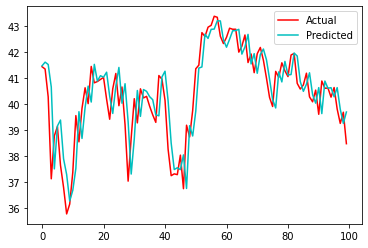

In [14]:
plt.plot(actual_price, "r", label = "Actual")
plt.plot(predicted_price, "c", label = "Predicted")
plt.legend()
plt.show()

In [15]:
import math
rmse = 0
for i in range(len(actual_price)):
    rmse += (actual_price[i] - predicted_price[i])**2
rmse = rmse/len(actual_price)
rmse = math.sqrt(rmse)

print(rmse)

0.9679076894433181
